### SA Languages Hackathon

In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns

from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
# sklearn
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# dataset loading and prepration

In [2]:
df = pd.read_csv('train_set.csv')
df.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [3]:
y = df['lang_id'].values
x = df['text'].values

In [4]:
df.groupby('lang_id').count()

,text
lang_id,
afr,3000
eng,3000
nbl,3000
nso,3000
sot,3000
ssw,3000
tsn,3000
tso,3000
ven,3000


Encode target labels with value between 0 and n_classes-1.

In [5]:
le = preprocessing.LabelEncoder()
le.fit(y)
classes = np.array(le.classes_)

In [6]:
y_encoded = le.transform(y)

<AxesSubplot:xlabel='lang_id', ylabel='count'>

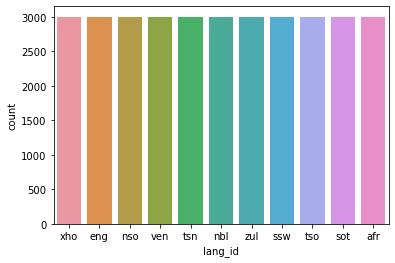

In [7]:
import seaborn as sns
sns.countplot(x='lang_id', data=df)

### processing Text

we are not removing stop words this time

In [8]:
def cleaning_text(text):
    
    tokenizer = RegexpTokenizer(r'\w+')
    ps = PorterStemmer()
    text = text.replace("<br /><br />"," ")
    
    text =  re.sub("[^A-Za-z ]", "" , text)
    text = text.lower()
    #Tokenize
    tokens = tokenizer.tokenize(text)
    #new_tokens = [token for token in tokens if token not in en_stopwords]
    stemmed_tokens = [ps.stem(token) for token in tokens]
    
    cleaned_text = ' '.join(stemmed_tokens)
    
    return cleaned_text

In [9]:
X = [cleaning_text(i) for i in x] 

# convert the text array into a 2d vector using Tfid

In [10]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=1000, min_df = 1, max_df = 0.5)
vectoriser.fit(X)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  1000


In [11]:
X_vector = vectoriser.transform(X)

# splitting into train and test with shuffling

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X_vector,y_encoded  , test_size=1/3,shuffle=True,  random_state=10)

In [13]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(22000, 1000)
(22000,)
(11000, 1000)
(11000,)


# applying different models to find the best accuracy

using k-Fold cross validation

In [15]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.metrics import confusion_matrix , plot_confusion_matrix , accuracy_score
from sklearn.model_selection import KFold ,cross_val_score

In [16]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
mnb = MultinomialNB()
mnb.fit(X_train, Y_train)
scores = cross_val_score(mnb, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.957 (0.004)


The rows in confusion matrix are predicted values The columns are True values diagonal is correct value

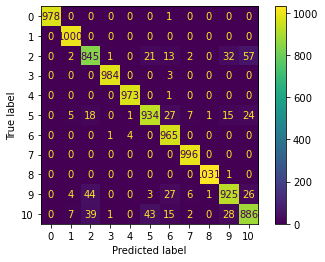

In [17]:
plot_confusion_matrix(mnb, X_test, Y_test)  

In [18]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
bnb = BernoulliNB()
bnb.fit(X_train, Y_train)
scores = cross_val_score(bnb, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.964 (0.004)


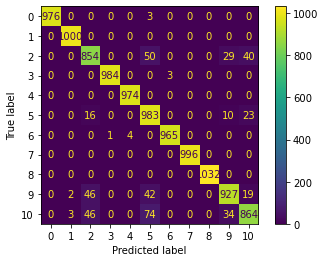

In [19]:
plot_confusion_matrix(bnb, X_test, Y_test) 

In [20]:
from sklearn.linear_model import LogisticRegression
cv = KFold(n_splits=10, random_state=1, shuffle=True)
lr = LogisticRegression()
lr.fit(X_train, Y_train)
scores = cross_val_score(lr, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

C:\Users\tyron\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.961 (0.004)


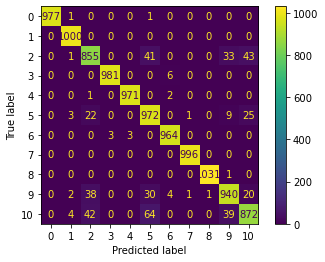

In [21]:
plot_confusion_matrix(lr, X_test, Y_test)

In [22]:
from sklearn.svm import SVC

cv = KFold(n_splits=10, random_state=1, shuffle=True)
svm = SVC(kernel ='linear', random_state = 103)
svm.fit(X_train, Y_train)
scores = cross_val_score(svm, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.959 (0.004)


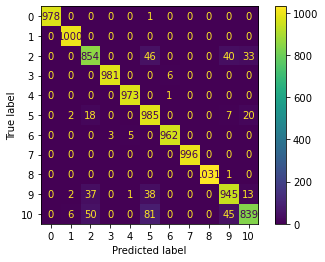

In [25]:
plot_confusion_matrix(svm, X_test, Y_test)

In [26]:
from sklearn.tree import DecisionTreeClassifier

cv = KFold(n_splits=10, random_state=1, shuffle=True)
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
scores = cross_val_score(dt, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.937 (0.005)


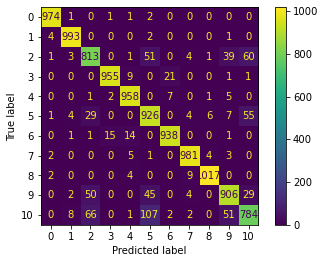

In [27]:
plot_confusion_matrix(dt, X_test, Y_test)

In [28]:
from sklearn.ensemble import RandomForestClassifier

cv = KFold(n_splits=10, random_state=1, shuffle=True)
rfc = RandomForestClassifier(n_estimators = 50)
rfc.fit(X_train, Y_train)
scores = cross_val_score(rfc, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.957 (0.004)


# predicting the language id
input is raw text
using Bernoulli NB (best score)

In [34]:
def Predict(x):
    x = [cleaning_text(i) for i in x] 
    X_vector = vectoriser.transform(x)
    y = bnb.predict(X_vector)
    return le.inverse_transform(y)

# storing the result in a csv

In [35]:
def Save_to_file(input_file):
    df = pd.read_csv(input_file)
    X = df['text'].values
    Y = Predict(X)
    output = pd.DataFrame()
    output['index'] = df['index']
    output['lang_id'] = Y
    sns.countplot(x = 'lang_id',data=output)
    output.to_csv('predicted.csv', index=False)

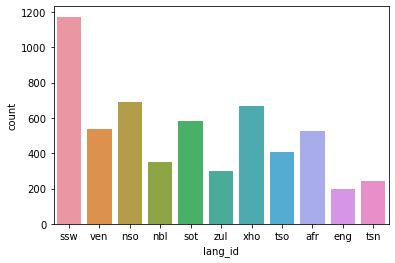

In [37]:
Save_to_file('test_set.csv')